In [733]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import math

In [734]:
def imshow(img):
    plt.imshow(img, cmap='gray')
    plt.show()

(299, 382, 3)


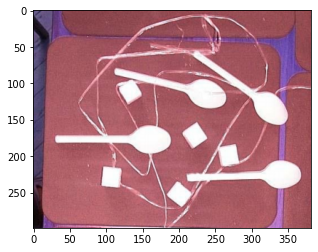

In [735]:
img = cv.imread('spoons.png', cv.COLOR_BGR2GRAY)
#img = img[:,:,2]
m,n,z = img.shape
print(img.shape)
plt.imshow(img)

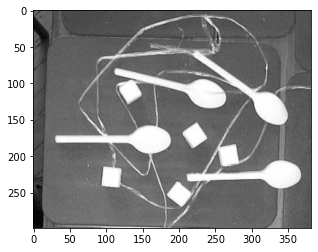

In [736]:
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
imshow(gray)

In [737]:
ret, binar = cv.threshold(gray,0,255, cv.THRESH_OTSU)

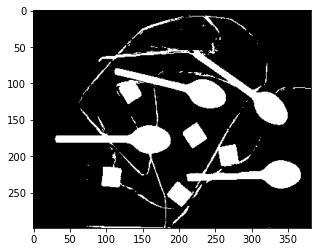

In [738]:
imshow(binar)

In [739]:
kernel = np.ones((4,4),np.uint8)
opening = cv.morphologyEx(binar,cv.MORPH_OPEN,kernel, iterations = 2)

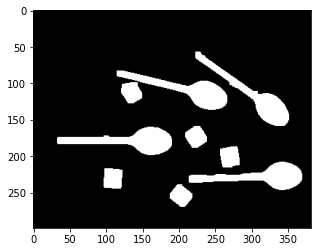

In [740]:
imshow(opening)

In [741]:
#kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE,(4,4))
kernel = np.ones((4,4))
erosion = cv.erode(opening,kernel, iterations = 1)

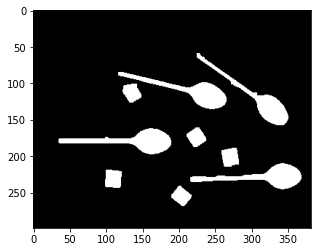

In [742]:
imshow(erosion)

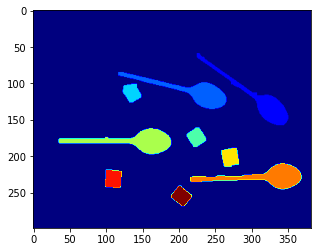

In [743]:
count_components, markers = cv.connectedComponents(erosion)
plt.imshow(markers, cmap="jet")

In [744]:
for i in range(count_components):
    print(len(markers[markers==i]))

103731
1873
2003
476
472
2143
512
2026
516
466


In [750]:
print(count_components)
#Найдем, какой маркер отвечает за фон, исходя из предположения, что этого цвета больше всего
background = 0 
bg_pix = 0
for i in range(count_components):
    pix_count = len(markers[markers==i])
    if (pix_count > bg_pix):
        bg_pix = pix_count
        background = i
print("Фон это маркер номер",background) #Зная, какой маркер отвечает за фон, посчитаем среднюю площадь объекта на картинке (в пикселях)

10
Фон это маркер номер 0


In [746]:
pix_avg = 0
pix_avg += len(markers[markers!=background])
pix_avg /= (count_components-1)
print(pix_avg)

1165.2222222222222


In [747]:
#Все объекты, площадь которых больше средней, отнесем к "большим" (ложкам), остальные - к "маленьким" (сахаркам)
big_obs_count = 0
small_obs_count = 0

for i in range(background):
    pix_count = len(markers[markers==i])
    if (pix_count > pix_avg):
        markers[markers==i] = count_components+1
        big_obs_count+=1
    else:
        markers[markers==i] = count_components+2
        small_obs_count +=1
        
for i in range(background+1, count_components):
    pix_count = len(markers[markers==i])
    if (pix_count > pix_avg):
        markers[markers==i] = count_components+1
        big_obs_count +=1
    else:
        markers[markers==i] = count_components+2
        small_obs_count +=1

In [748]:
print(len(markers[markers==count_components+1]))
print(len(markers[markers==count_components+2]))

8045
2442


Количество ложек: 4
Количество сахарков: 5


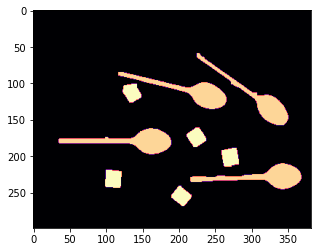

In [749]:
print("Количество ложек:", big_obs_count)
print("Количество сахарков:", small_obs_count)
plt.imshow(markers, cmap="magma")